# Bruteforce for Maxcut problem

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import pandas as pd
import seaborn as sns
import os
from datetime import datetime

## Graph generating

In [2]:
def generate_random_graph(n_nodes=8, p=0.5, seed=None):
    G = nx.erdos_renyi_graph(n_nodes, p, seed=seed)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = np.random.randint(1, 10)
    return G

## Algorithm

In [3]:
def brute_force_maxcut(G):
    n = G.number_of_nodes()
    nodes = list(G.nodes())
    best_cut = None
    best_value = -np.inf
    for bits in itertools.product([0, 1], repeat=n):
        cut_value = 0
        for u, v in G.edges():
            if bits[nodes.index(u)] != bits[nodes.index(v)]:
                cut_value += G.edges[u, v]['weight']
        if cut_value > best_value:
            best_value = cut_value
            best_cut = bits
    return best_cut, best_value

## Experiment function

In [4]:
def run_bruteforce_experiment_time_budget(sizes, edge_prob=0.5, time_per_size=420):
    all_cut_values = []
    all_times = []
    for n_nodes in sizes:
        cut_values = []
        times = []
        start_time = time.time()
        g_idx = 0
        while time.time() - start_time < time_per_size:
            G = generate_random_graph(n_nodes=n_nodes, p=edge_prob, seed=g_idx)
            t0 = time.time()
            cut, value = brute_force_maxcut(G)
            t1 = time.time()
            cut_values.append(value)
            times.append(t1 - t0)
            g_idx += 1
        all_cut_values.append(cut_values)
        all_times.append(times)
        print(f"Size: {n_nodes} | Graphs: {g_idx} | Mean Cut: {np.mean(cut_values):.2f} | Mean Time: {np.mean(times):.3f}s")
    return all_cut_values, all_times

## Experiment + plot + csv

Size: 8 | Graphs: 33395 | Mean Cut: 57.56 | Mean Time: 0.002s
Size: 10 | Graphs: 5836 | Mean Cut: 89.19 | Mean Time: 0.010s
Size: 12 | Graphs: 1002 | Mean Cut: 126.51 | Mean Time: 0.060s
Size: 14 | Graphs: 181 | Mean Cut: 171.45 | Mean Time: 0.333s
Size: 16 | Graphs: 33 | Mean Cut: 226.03 | Mean Time: 1.834s
Size: 18 | Graphs: 7 | Mean Cut: 276.29 | Mean Time: 9.115s
Size: 20 | Graphs: 2 | Mean Cut: 310.50 | Mean Time: 43.479s
Results saved to data/bf-data/bf_20250614_190109.csv


C:\Users\jakub\AppData\Local\Temp\ipykernel_9488\1706757280.py:20: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Graph Size', y='Time', data=df, inner='quartile', scale='width')


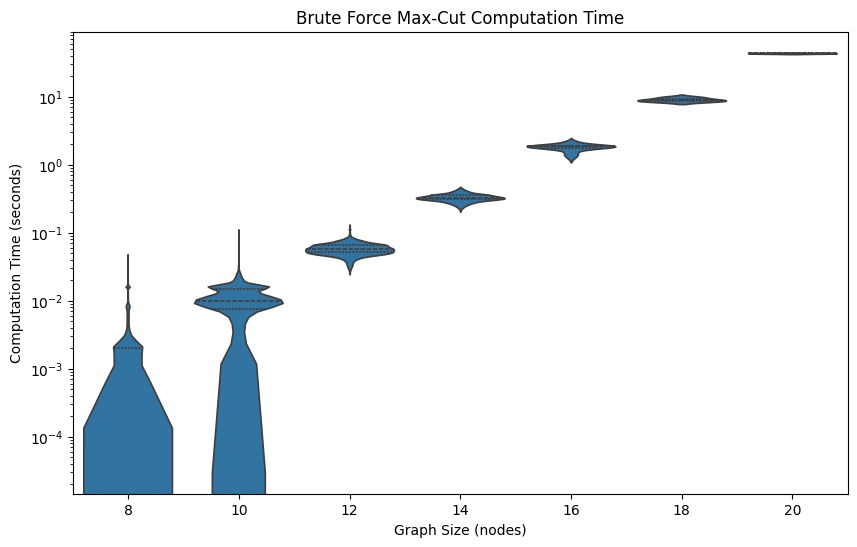

In [5]:
sizes = [8, 10, 12, 14, 16, 18, 20]
edge_prob = 0.5
time_per_size = 60

cut_values, times = run_bruteforce_experiment_time_budget(sizes, edge_prob, time_per_size)

df = pd.DataFrame({
    'Graph Size': sum([[size]*len(vals) for size, vals in zip(sizes, cut_values)], []),
    'Cut Value': sum(cut_values, []),
    'Time': sum(times, [])
})

os.makedirs("data/bf-data", exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_path = f"data/bf-data/bf_{timestamp}.csv"
df.to_csv(csv_path, index=False)
print(f"Results saved to {csv_path}")

plt.figure(figsize=(10,6))
sns.violinplot(x='Graph Size', y='Time', data=df, inner='quartile', scale='width')
plt.title('Brute Force Max-Cut Computation Time')
plt.xlabel('Graph Size (nodes)')
plt.ylabel('Computation Time (seconds)')
plt.yscale('log')
plt.show()

In [ ]:
# Note: Need to save plots to files